Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [1]:
NAME = "pjmerica"  # your uniqname 
COLLABORATORS = c(kaspersj, aayushap, sohumm)  # vector of uniqnames of your collaborators, if any
## IMPORTANT: you must also have set your group on Canvas. This is only used as a backup.

ERROR: Error in eval(expr, envir, enclos): object 'kaspersj' not found


---

In [3]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# STATS 306
## Problem Set 5: Tidy Data
Each question is worth two points, for a total of 10.

(This problem set is half as long as usual. So as not to cut into your study break, it is due one day earlier than normal, on **Sunday night at 11:59pm**.)

Problems 1-4 look at a dataset called `UCBAdmissions`. This contains graduate school admissions data from 1973 for six departments at UC Berkeley:

In [4]:
data(UCBAdmissions)
ucb <- tbl_df(UCBAdmissions) %>% print

# A tibble: 24 x 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# ... with 14 more rows


(For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.)

### Problem 1 (2 pts.)
Using the tool(s) we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have four columns: `Gender`, `Accepted`, `Rejected`, and `Acceptance Proportion` (the fraction of accepted applicants within each gender) and should look like this:

<table>
<thead><tr><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Acceptance Proportion</th></tr></thead>
<tbody>
	<tr><td>Female   </td><td> 557     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>Male     </td><td> &dash;     </td><td>&dash;     </td><td>0.4451877</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

Store the resulting tibble in a variable called `table1`.

In [7]:

HopefulFratpledges = ucb %>% group_by(Gender) %>% filter(Admit == "Admitted") %>% summarize(Admitted = sum(n))
Communitycollege = ucb %>% group_by(Gender) %>% filter(Admit == "Rejected") %>% summarize(Rejected = sum(n))
table1 = HopefulFratpledges %>% left_join(Communitycollege, by = "Gender") %>% mutate("Acceptance Proportion" = Admitted/(Admitted + Rejected))
head(table1)


Gender,Admitted,Rejected,Acceptance Proportion
Female,557,1278,0.3035422
Male,1198,1493,0.4451877


In [ ]:
stopifnot(exists("table1"))
stopifnot(table1[1,"Admitted"] == 557L)
stopifnot(near(table1[[2,"Acceptance Proportion"]], .4451877, tol = 1e-3))

### Problem 2 (2 pts.)
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to Problem 1. Was the overall acceptance proportion for men statistically different from that of women? Perform an appropriate test and interpret your findings. What do these result suggest about admissions practices at UC Berkeley in the early 1970s?

To test for significance we must do a two proportion z test with a  hypothesis of p1=p2. To perform this we must first find the general p which is = (557 +1198/ 557+1278+1198+1493). This equals .63345. We are provided p1 and p2 by the Acceptance rate proportion. p1 = .4451877 & p2 = .303355422. We then plug these values into the equation z = (p1-p2)/sqrt(p(1-p)(1/n1+1/n2) where p = the general p described above and n is that sample sizes of men and female. We get a z score of 9.7. This corresponds to a p value of <.001 which is less than .05, so the overall acceptance proportion for men was statistically different from that of women in UC Berkeley in the early 1970s.

### Problem 3 (2 pts.)
Reproduce the table from Problem 1, but now stratify by department. 
Compute the male and female acceptance proportion for each department separately.
Your resulting table should look like:


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male_Accept_Proportion</th><th scope="col">Female_Accept_Proportion</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>

(Again, a few table entries have been provided to help you check your work, and it is your job to provide code that computes the entire table automatically.)

Store your resulting table in a variable called `table3`.

In [8]:
Successful_men = ucb %>% group_by(Dept) %>% filter(Admit == "Admitted" , Gender == "Male") %>% summarize(Male_Admitted = sum(n))
Tough_luck_men = ucb %>% group_by(Dept) %>% filter(Admit == "Rejected" , Gender == "Male") %>% summarize(Male_Rejected = sum(n))
Independent_women = ucb %>% group_by(Dept) %>% filter(Admit == "Admitted" , Gender == "Female") %>% summarize(Female_Admitted = sum(n))
Sexism_wins = ucb %>% group_by(Dept) %>% filter(Admit == "Rejected" , Gender == "Female") %>% summarize(Female_Rejected = sum(n))
table3 = Independent_women %>% left_join(Sexism_wins, by = "Dept") %>% left_join(Successful_men, by = "Dept") %>%
left_join(Tough_luck_men, by = "Dept") %>%
mutate("Male_Accept_Proportion" = Male_Admitted/(Male_Admitted + Male_Rejected)) %>% mutate("Female_Accept_Proportion" = Female_Admitted/(Female_Admitted +Female_Rejected))
head(table3)

Dept,Female_Admitted,Female_Rejected,Male_Admitted,Male_Rejected,Male_Accept_Proportion,Female_Accept_Proportion
A,89,19,512,313,0.62060606,0.82407407
B,17,8,353,207,0.63035714,0.68000000
C,202,391,120,205,0.36923077,0.34064081
D,131,244,138,279,0.33093525,0.34933333
E,94,299,53,138,0.27748691,0.23918575
F,24,317,22,351,0.05898123,0.07038123


In [ ]:
stopifnot(table3[[1, "Female_Admitted"]] == 89L)
stopifnot(table3[[2, "Male_Admitted"]] == 353L)
stopifnot(table3[[3, "Female_Rejected"]] == 391L)
stopifnot(near(table3[[4, "Male_Accept_Proportion"]], 0.33093525, tol=1e-6))
stopifnot(table3[[5, "Male_Rejected"]] == 138L)
stopifnot(near(table3[[6, "Female_Accept_Proportion"]], 0.07038123, tol=1e-6))

### Problem 4 (2 pts.)
Do the department-level findings in Problem 3 agree or disagree with what you concluded in Problem 2? Explain your reasoning.

No, they do not support my findings in problem A because the departments seem to be fairly equal in acceptance rate, or even biased towards women in the case of department A and department F. The only one's where it is close are departments C,D and F where women have an acceptance difference of ~-.2, ~+.1, ~-.4. This is a similar problem to the Simpson's paradox, because the conclusions are different when the data is separated rather than combined.

### Problem 5 (2 pts.)
The file `nottem.csv` contains monthly average air temperatures measured at Nottingham Castle for 20 years:

In [9]:
nottem <- read_csv("nottem.csv")
print(nottem)

Parsed with column specification:
cols(
  Year = col_integer(),
  Jan = col_double(),
  Feb = col_double(),
  Mar = col_double(),
  Apr = col_double(),
  May = col_double(),
  Jun = col_double(),
  Jul = col_double(),
  Aug = col_double(),
  Sep = col_double(),
  Oct = col_double(),
  Nov = col_double(),
  Dec = col_double()
)


# A tibble: 20 x 13
    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov
   <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  1920  40.6  40.8  44.4  46.7  54.1  58.5  57.7  56.4  54.3  50.5  42.9
 2  1921  44.2  39.8  45.1  47    54.1  58.7  66.3  59.9  57    54.2  39.7
 3  1922  37.5  38.7  39.5  42.1  55.7  57.8  56.8  54.3  54.3  47.1  41.8
 4  1923  41.8  40.1  42.9  45.8  49.2  52.7  64.2  59.6  54.4  49.2  36.3
 5  1924  39.3  37.5  38.3  45.5  53.2  57.7  60.8  58.2  56.4  49.8  44.4
 6  1925  40    40.5  40.8  45.1  53.8  59.4  63.5  61    53    50    38.1
 7  1926  39.2  43.4  43.4  48.9  50.6  56.8  62.5  62    57.5  46.7  41.6
 8  1927  39.4  38.5  45.3  47.1  51.7  55    60.4  60.5  54.7  50.3  42.3
 9  1928  40.8  41.1  42.8  47.3  50.9  56.4  62.2  60.5  55.4  50.2  43  
10  1929  34.8  31.3  41    43.9  53.1  56.9  62.5  60.3  59.8  49.2  42.9
11  1930  41.6  37.1  41.2  46.9  51.2  60.4  60.1  61.6  57    50.9  43  
12  1

Convert these data to tidy format, and use them to create the following plot of the temperature over this time period:
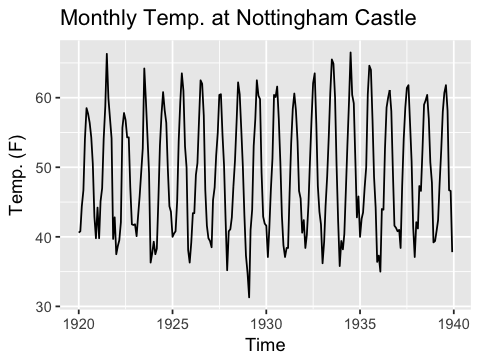

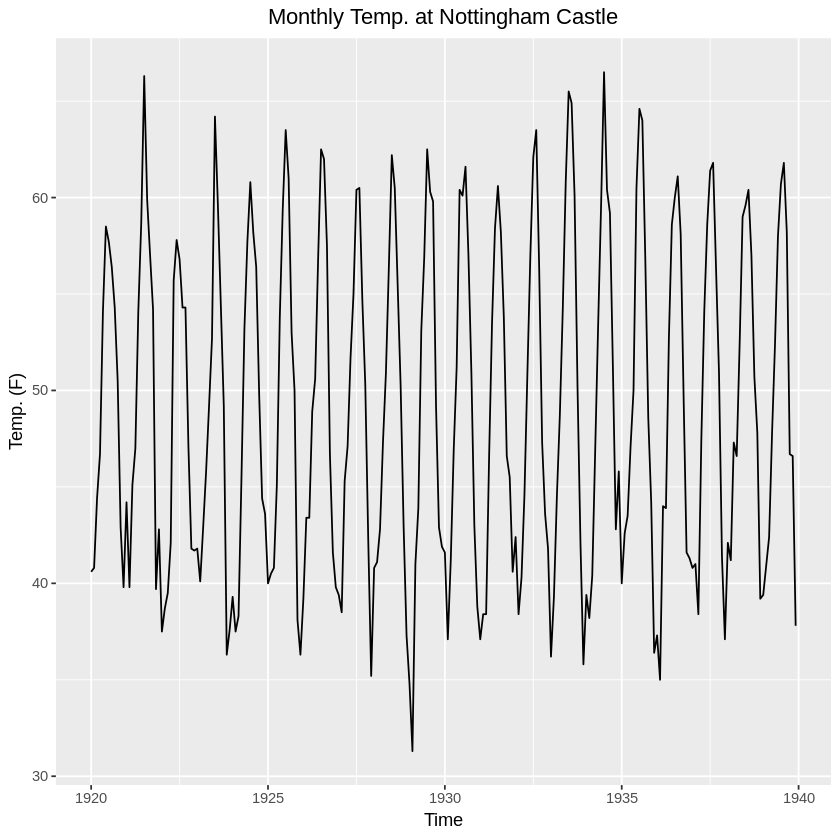

In [10]:
nottem %>% group_by(Year) %>% gather(Jan:Dec, key= Month, value = temps) %>%
arrange(Year) %>% mutate(Month = c(0:11/12)) %>% ungroup(Year) %>% mutate(Year = (Year+Month)) %>%
ggplot(mapping = aes(x=Year, y = temps)) + geom_line() + labs(x = "Time",y = "Temp. (F)") +
ggtitle("Monthly Temp. at Nottingham Castle") + theme(plot.title = element_text(hjust = 0.5))